<a href="https://colab.research.google.com/github/ueqbe/gender_prediction/blob/main/age_gender_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
epochs=100
lr=1e-3
batch_size=64
img_dims=(96, 96, 3)

In [ ]:
data=[]
labels=[]

In [ ]:
image_files=[f for f in glob.glob(r'/content/drive/MyDrive/gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [ ]:
for img in image_files:
  image=cv2.imread(img)

  image=cv2.resize(image, (img_dims[0],img_dims[1]))
  image=img_to_array(image)
  data.append(image)

  label=img.split(os.path.sep)[-2]
  if label=="woman":
    label=1
  else:
    label=0

  labels.append([label])

In [ ]:
data=np.array(data, dtype="float")/255.0
labels=np.array(labels)


In [ ]:
(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.2, random_state=42)

trainY=to_categorical(trainY, num_classes=2)
testY=to_categorical(testY, num_classes=2)

In [ ]:
#2
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_dims)

# Freeze the layers of the base model
base_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
#2
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))  # Assuming 2 classes: man and woman

# Compile the model
model2.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#2
H2=model2.fit_generator(train_datagen.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX, testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)

<ipython-input-13-43a71032c743>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H2=model.fit_generator(train_datagen.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX, testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


Epoch 1/100
 5/25 [=====>........................] - ETA: 1:36 - loss: 0.6943 - accuracy: 0.4781

KeyboardInterrupt: 

In [ ]:
model2=load_model('/content/drive/MyDrive/gender_det_mod.keras')

In [ ]:
model2=load_model('/content/drive/MyDrive/gender_det_mod.keras')

In [ ]:
aug=ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [ ]:
#Modelling
def build_CNN_wo_do(width, height,depth, classes):
  model=Sequential()
  inputShape=(height, width, depth)
  chanDim=-1

  if K.image_data_format()=="channels_first": #Returns eithe channel first or channel last
    inputShape=(depth, height, width)
    chanDim=1
  model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(3, 3)))


  model.add(Conv2D(64, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))

  model.add(Conv2D(64, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(128, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))

  model.add(Conv2D(128, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())


  model.add(Dense(classes))
  model.add(Activation("sigmoid"))
  return model

In [ ]:
#Modelling
def build(width, height,depth, classes):
  model=Sequential()
  inputShape=(height, width, depth)
  chanDim=-1

  if K.image_data_format()=="channels_first": #Returns eithe channel first or channel last
    inputShape=(depth, height, width)
    chanDim=1
  model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))

  model.add(Conv2D(64, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))

  model.add(Conv2D(128, (3,3), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(classes))
  model.add(Activation("sigmoid"))
  return model

In [ ]:
#build model
model=build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)

In [ ]:
#compile model
opt=Adam(lr=lr)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"]) #opt: tells how weight distributed using back propagation

In [ ]:
H=model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX, testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)

<ipython-input-14-193015da6a83>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H=model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX, testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


Epoch 1/100
 3/25 [==>...........................] - ETA: 1:09 - loss: 0.0658 - accuracy: 0.9740

KeyboardInterrupt: 

In [ ]:
model.save('/content/drive/MyDrive/model_gender_detection.keras')

In [ ]:
plt.style.use("ggplot")
plt.figure()
N=epochs
plt.plot(np.arange(0,N), model.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), model.history["val_loss"], label="val_loss")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use("ggplot2")
plt.figure()
N=epochs
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")



NameError: name 'plt' is not defined

In [ ]:
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [ ]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=6c0ce356ad889fef06526ead9dcd62a4c46fb40e19d3d7b43b7ac57f5f5e1185
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=6586ad12971cbd16c437d25f755b93a18b033cc1e34a6945bcb43b1465375db5
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
classes=['man', 'woman']

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


model 1 confusion matrix

In [ ]:
train_predictions = model.predict(trainX)
test_predictions = model.predict(testX)

train_predictions = np.argmax(train_predictions, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

train_labels = np.argmax(trainY, axis=1)
test_labels = np.argmax(testY, axis=1)


13/13 [==============================] - 1s 42ms/step


In [ ]:
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)


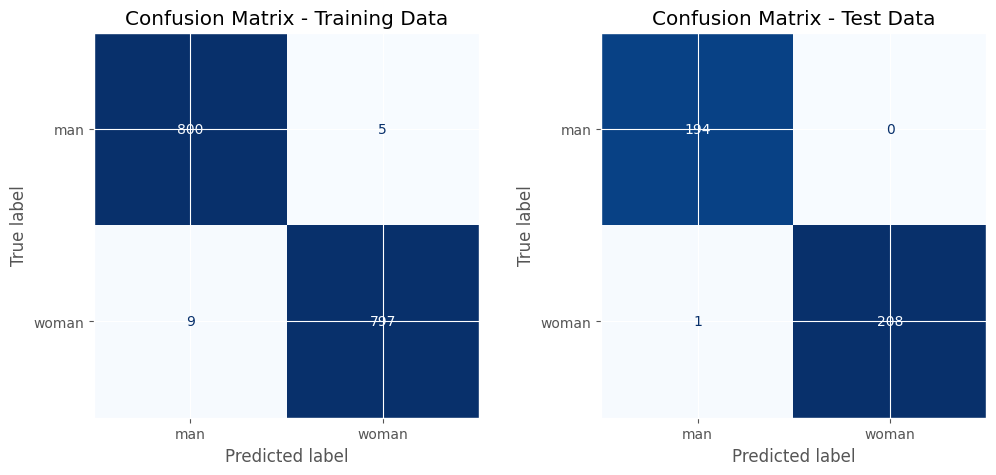

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(train_cm, display_labels=['man', 'woman']).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title('Confusion Matrix - Training Data')

ConfusionMatrixDisplay(test_cm, display_labels=['man', 'woman']).plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title('Confusion Matrix - Test Data')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

train_classification_report = classification_report(train_labels, train_predictions, target_names=['man', 'woman'])
train_accuracy = accuracy_score(train_labels, train_predictions)

test_classification_report = classification_report(test_labels, test_predictions, target_names=['man', 'woman'])
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Training Data Metrics:")
print(train_classification_report)
print(f"Training Accuracy: {train_accuracy:.4f}\n")

print("Test Data Metrics:")
print(test_classification_report)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Data Metrics:
              precision    recall  f1-score   support

         man       0.99      0.99      0.99       805
       woman       0.99      0.99      0.99       806

    accuracy                           0.99      1611
   macro avg       0.99      0.99      0.99      1611
weighted avg       0.99      0.99      0.99      1611

Training Accuracy: 0.9913

Test Data Metrics:
              precision    recall  f1-score   support

         man       0.99      1.00      1.00       194
       woman       1.00      1.00      1.00       209

    accuracy                           1.00       403
   macro avg       1.00      1.00      1.00       403
weighted avg       1.00      1.00      1.00       403

Test Accuracy: 0.9975


13/13 [==============================] - 1s 39ms/step


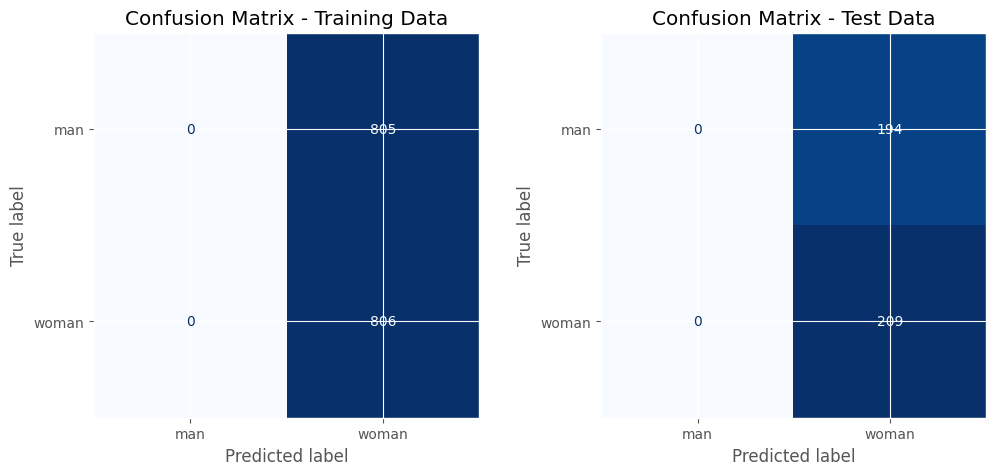

Training Data Metrics:
              precision    recall  f1-score   support

         man       0.00      0.00      0.00       805
       woman       0.50      1.00      0.67       806

    accuracy                           0.50      1611
   macro avg       0.25      0.50      0.33      1611
weighted avg       0.25      0.50      0.33      1611

Training Accuracy: 0.5003

Test Data Metrics:
              precision    recall  f1-score   support

         man       0.00      0.00      0.00       194
       woman       0.52      1.00      0.68       209

    accuracy                           0.52       403
   macro avg       0.26      0.50      0.34       403
weighted avg       0.27      0.52      0.35       403

Test Accuracy: 0.5186


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
#model 2 metrics

# Make predictions
train_predictions2 = model2.predict(trainX)
test_predictions2 = model2.predict(testX)

# Convert predictions and true labels to class indices
train_predictions2 = np.argmax(train_predictions2, axis=1)
test_predictions2 = np.argmax(test_predictions2, axis=1)

train_labels2 = np.argmax(trainY, axis=1)
test_labels2 = np.argmax(testY, axis=1)

# Build confusion matrices
train_cm2 = confusion_matrix(train_labels2, train_predictions2)
test_cm2 = confusion_matrix(test_labels2, test_predictions2)

# Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(train_cm2, display_labels=['man', 'woman']).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title('Confusion Matrix - Training Data')

ConfusionMatrixDisplay(test_cm2, display_labels=['man', 'woman']).plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title('Confusion Matrix - Test Data')

plt.show()

# Calculate and print classification metrics
train_classification_report2 = classification_report(train_labels2, train_predictions2, target_names=['man', 'woman'])
train_accuracy2 = accuracy_score(train_labels2, train_predictions2)

test_classification_report2 = classification_report(test_labels2, test_predictions2, target_names=['man', 'woman'])
test_accuracy2 = accuracy_score(test_labels2, test_predictions2)

print("Training Data Metrics:")
print(train_classification_report2)
print(f"Training Accuracy: {train_accuracy2:.4f}\n")

print("Test Data Metrics:")
print(test_classification_report2)
print(f"Test Accuracy: {test_accuracy2:.4f}")

In [ ]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=f030736eb8fdbf336d504116b6c44180662f9bb716872b6458c0c39a18c6db60
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=9822f3cfbce30904c90d81745d71f5a7452e71a1cb22620b51c5f19310520d3e
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
import cvlib as cv
from google.colab.patches import cv2_imshow

video_path = '/content/drive/MyDrive/WhatsApp Video 2024-05-13 at 17.55.52 (1).mp4'
video = cv2.VideoCapture(video_path)

classes = ['man', 'woman']

# Loop through frames in the video
while video.isOpened():
    status, frame = video.read()

    if not status:
        break

    # Apply face detection
    faces, confidences = cv.detect_face(frame)

    for idx, face in enumerate(faces):
        startX, startY, endX, endY = face

        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

        face_crop = frame[startY:endY, startX:endX]

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (96, 96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model.predict(face_crop)[0]

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

In [ ]:
video_path = '/content/drive/MyDrive/WhatsApp Video 2024-05-13 at 17.55.52 (1).mp4'
video = cv2.VideoCapture(video_path)

classes = ['man', 'woman']

# Loop through frames in the video
while video.isOpened():
    status, frame = video.read()

    if not status:
        break

    # Apply face detection
    faces, confidences = cv.detect_face(frame)

    for idx, face in enumerate(faces):
        startX, startY, endX, endY = face

        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

        face_crop = frame[startY:endY, startX:endX]

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (96, 96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model2.predict(face_crop)[0]

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows() #new

In [ ]:
video_path = '/content/drive/MyDrive/subash.mp4'
video = cv2.VideoCapture(video_path)

classes = ['man', 'woman']

# Loop through frames in the video
while video.isOpened():
    status, frame = video.read()

    if not status:
        break

    # Apply face detection
    faces, confidences = cv.detect_face(frame)

    for idx, face in enumerate(faces):
        startX, startY, endX, endY = face

        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

        face_crop = frame[startY:endY, startX:endX]

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (96, 96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model.predict(face_crop)[0]

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows() #new